# Parse EWX Ingestion Payload

In [4]:
%matplotlib notebook
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import EWX_forecast as ewx
import pprint
import json
import os

base = os.getcwd()
os.chdir('C:\\Users\wb5888\Documents\EWX\EWX')
base = os.getcwd()
pp = pprint.PrettyPrinter(3)
print('imported modules. working in {}'.format(base))

imported modules. working in C:\Users\wb5888\Documents\EWX\EWX


## Show json files, parse ingest

In [5]:
filedf = ewx.sortdir(base, 5)

files found in dir:  C:\Users\wb5888\Documents\EWX\EWX
                                               files                time
0                        NEPOOL_PSNH_80001901521.csv 2020-03-05 10:40:19
1  20200304110101030000_NEPOOL_PSNH_80001901521.json 2020-03-05 10:39:04
2                         NEPOOL_MECO_7696976009.csv 2020-03-03 13:43:25
3                        NEPOOL_BECO_28773420014.csv 2020-01-02 15:21:06
4             NEPOOL_CLP_51267217032_379753005_3.csv 2020-01-02 15:09:40


In [6]:
json_file = filedf.files[1]
json_file

'20200304110101030000_NEPOOL_PSNH_80001901521.json'

In [7]:
with open(json_file) as raw:
    print("loading json...")
    data = json.load(raw) #raw json file
    acct = data['account'] #get account data
    idr = acct['timeseriesdataidr'] #dictionary of acct attributes
    sca = acct['timeseriesdatascalar']

pp.pprint(acct)

loading json...
{  'accountnumber': '80001901521',
   'captag': [  {  'lstime': '2020-02-26 12:45:08',
                   'lsuser': 'TESI_INTERFACE',
                   'start': '2019-06-01 00:00:00',
                   'stop': '2020-05-31 23:59:59',
                   'sv': 'H',
                   'v': '474.75800'}],
   'cogenflag': None,
   'discocode': 'PSNH',
   'forecastflag': 'Y',
   'lossclass': 'GV',
   'market': 'NEPOOL',
   'meterreadcycle': '12',
   'metertype': 'IDR',
   'netmeterflag': None,
   'premise': {  'address': 'UNKNOWN UNKNOWN',
                 'city': 'UNKNOWN',
                 'country': 'USA',
                 'county': 'Grafton',
                 'customerid': '1-3SKGY',
                 'name': 'DEMOULAS SUPER MARKETS INC',
                 'state': 'NH',
                 'zip': '00000'},
   'prid': '1-ZWYQTS_1',
   'prnumber': '1-ZWYQTS',
   'profilebuilder': 'I',
   'profileclass': 'GV_IDR',
   'rateclass': 'GV',
   'ratesubclass': None,
   'rechargeny': 

## Scalar

In [8]:
sca = pd.DataFrame(sca)
sca

,start,stop,v,p
0,2020-01-21 00:00:00,2020-02-18 23:59:59,214800,"{'readtype': 'H', 'totaldemand': 375}"
1,2019-12-18 00:00:00,2020-01-20 23:59:59,254600,"{'readtype': 'H', 'totaldemand': 379}"
2,2019-11-18 00:00:00,2019-12-17 23:59:59,228400,"{'readtype': 'H', 'totaldemand': 383}"
3,2019-10-18 00:00:00,2019-11-17 23:59:59,239400,"{'readtype': 'H', 'totaldemand': 394}"
4,2019-09-19 00:00:00,2019-10-17 23:59:59,232200,"{'readtype': 'H', 'totaldemand': 412}"
5,2019-08-20 00:00:00,2019-09-18 23:59:59,239600,"{'readtype': 'H', 'totaldemand': 410}"
6,2019-07-19 00:00:00,2019-08-19 23:59:59,268800,"{'readtype': 'H', 'totaldemand': 435}"
7,2019-06-19 00:00:00,2019-07-18 23:59:59,248600,"{'readtype': 'H', 'totaldemand': 451}"
8,2019-05-20 00:00:00,2019-06-18 23:59:59,236600,"{'readtype': 'H', 'totaldemand': 402}"
9,2019-04-18 00:00:00,2019-05-19 23:59:59,244400,"{'readtype': 'H', 'totaldemand': 399}"


## Tags

In [9]:
caps = pd.DataFrame.from_records(acct['captag'])
caps

,start,stop,v,sv,lstime,lsuser
0,2019-06-01 00:00:00,2020-05-31 23:59:59,474.75800,H,2020-02-26 12:45:08,TESI_INTERFACE


## Plot ingest IDR

<IPython.core.display.Javascript object>


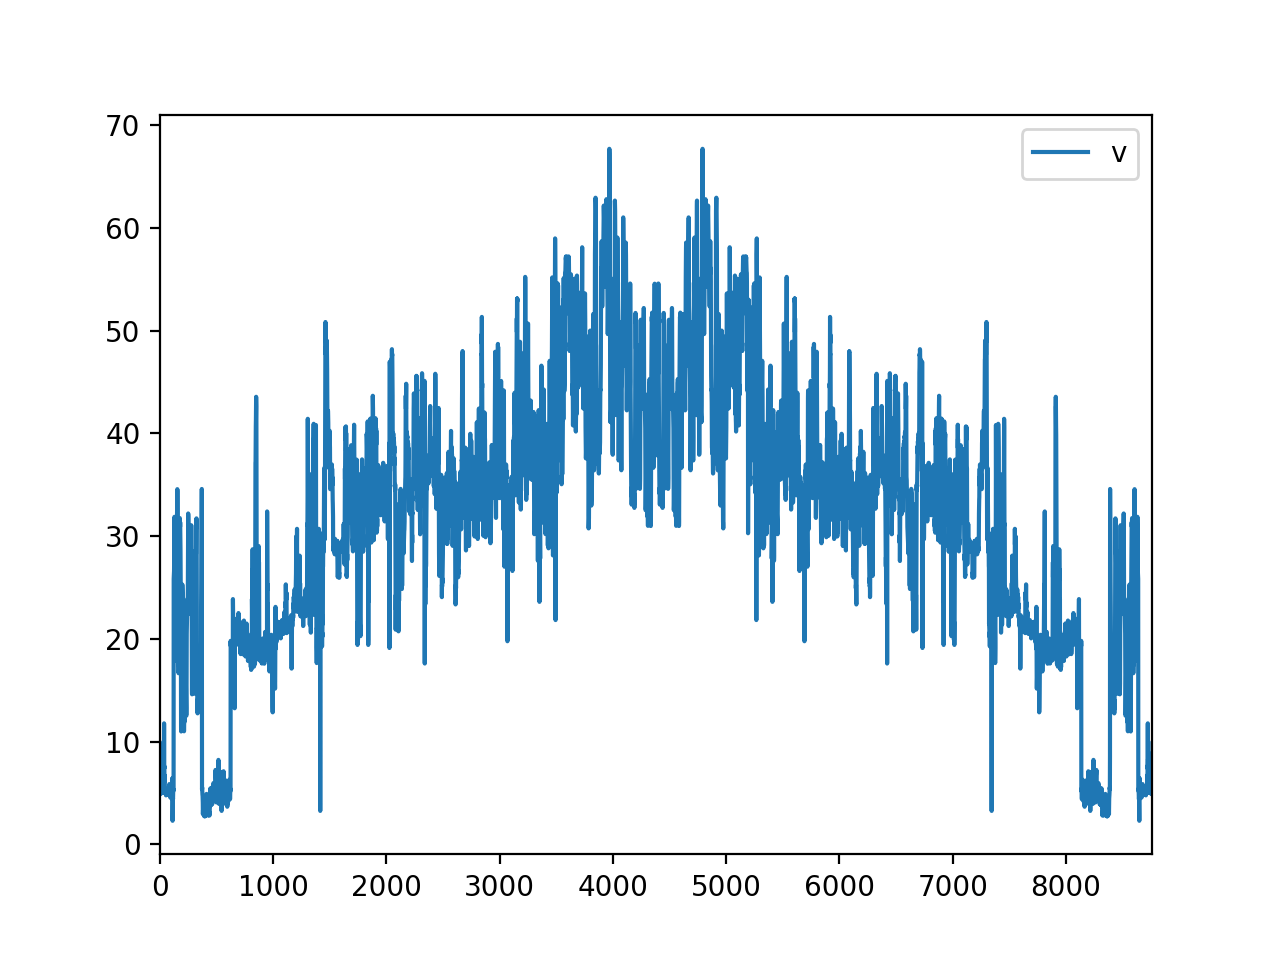

In [13]:
reads = idr[0]['reads']
temp = pd.DataFrame.from_dict(reads)
temp['v'] = pd.to_numeric(temp['v'])
temp.plot(y = 'v')

## Read in adjusted IDR

In [10]:
filedf = ewx.sortdir(base, 5)
csv_file = filedf.files[0]
csv_file

files found in dir:  C:\Users\wb5888\Documents\EWX\EWX
                                               files                time
0                        NEPOOL_PSNH_80001901521.csv 2020-03-05 10:40:19
1  20200304110101030000_NEPOOL_PSNH_80001901521.json 2020-03-05 10:39:04
2                         NEPOOL_MECO_7696976009.csv 2020-03-03 13:43:25
3                        NEPOOL_BECO_28773420014.csv 2020-01-02 15:21:06
4             NEPOOL_CLP_51267217032_379753005_3.csv 2020-01-02 15:09:40


'NEPOOL_PSNH_80001901521.csv'

<IPython.core.display.Javascript object>


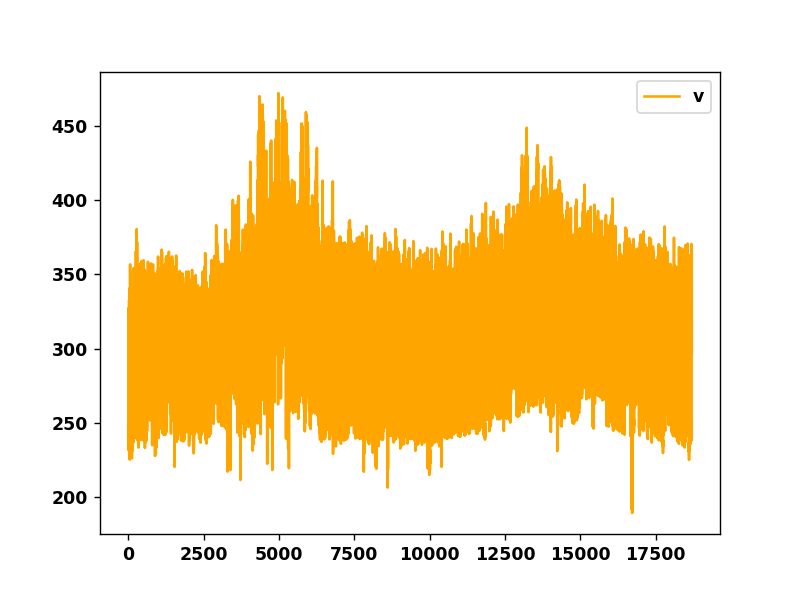

In [11]:
new_idr = pd.read_csv(csv_file)
new_idr.columns = ['t', 'v']
new_idr['t'] = pd.to_datetime(new_idr['t'])
new_idr.plot(y = 'v', color = 'orange')

In [12]:
new_idr['t'] = [str(t) for t in new_idr.t]
new_idr['v'] = [str(v) for v in new_idr.v]
json_df = new_idr.to_json(orient = 'records')
json_df = json.loads(json_df)

## Add IDR to IDR payload

In [13]:
idr[0]['reads'] = json_df

IndexError: list index out of range

## Add IDR to scalar payload

In [14]:
acct['timeseriesdataidr'] = []
idr.append(dict([('reads', json_df)]))
acct['timeseriesdataidr'] = idr

In [15]:
pp.pprint(acct)

{  'accountnumber': '80001901521',
   'captag': [  {  'lstime': '2020-02-26 12:45:08',
                   'lsuser': 'TESI_INTERFACE',
                   'start': '2019-06-01 00:00:00',
                   'stop': '2020-05-31 23:59:59',
                   'sv': 'H',
                   'v': '474.75800'}],
   'cogenflag': None,
   'discocode': 'PSNH',
   'forecastflag': 'Y',
   'lossclass': 'GV',
   'market': 'NEPOOL',
   'meterreadcycle': '12',
   'metertype': 'IDR',
   'netmeterflag': None,
   'premise': {  'address': 'UNKNOWN UNKNOWN',
                 'city': 'UNKNOWN',
                 'country': 'USA',
                 'county': 'Grafton',
                 'customerid': '1-3SKGY',
                 'name': 'DEMOULAS SUPER MARKETS INC',
                 'state': 'NH',
                 'zip': '00000'},
   'prid': '1-ZWYQTS_1',
   'prnumber': '1-ZWYQTS',
   'profilebuilder': 'I',
   'profileclass': 'GV_IDR',
   'rateclass': 'GV',
   'ratesubclass': None,
   'rechargeny': None,
   'revisi

                                          {  't': '2018-01-27 11:00:00',
                                             'v': '323.5800018'},
                                          {  't': '2018-01-27 12:00:00',
                                             'v': '313.67999269999996'},
                                          {  't': '2018-01-27 13:00:00',
                                             'v': '324.3000031'},
                                          {  't': '2018-01-27 14:00:00',
                                             'v': '321.5999908'},
                                          {  't': '2018-01-27 15:00:00',
                                             'v': '325.31999210000004'},
                                          {  't': '2018-01-27 16:00:00',
                                             'v': '351.23999019999997'},
                                          {  't': '2018-01-27 17:00:00',
                                             'v': '345.1199799'},
      

                                          {  't': '2018-02-21 10:00:00',
                                             'v': '339.7799988'},
                                          {  't': '2018-02-21 11:00:00',
                                             'v': '337.31999210000004'},
                                          {  't': '2018-02-21 12:00:00',
                                             'v': '333.05999760000003'},
                                          {  't': '2018-02-21 13:00:00',
                                             'v': '343.5'},
                                          {  't': '2018-02-21 14:00:00',
                                             'v': '346.31999210000004'},
                                          {  't': '2018-02-21 15:00:00',
                                             'v': '338.7599945'},
                                          {  't': '2018-02-21 16:00:00',
                                             'v': '348.6599884'},
            

                                             'v': '324.4799805'},
                                          {  't': '2018-03-21 12:00:00',
                                             'v': '320.6999969'},
                                          {  't': '2018-03-21 13:00:00',
                                             'v': '324.6599884'},
                                          {  't': '2018-03-21 14:00:00',
                                             'v': '325.07998660000004'},
                                          {  't': '2018-03-21 15:00:00',
                                             'v': '323.6999969'},
                                          {  't': '2018-03-21 16:00:00',
                                             'v': '328.61999510000004'},
                                          {  't': '2018-03-21 17:00:00',
                                             'v': '316.44000239999997'},
                                          {  't': '2018-03-21 18:00:00',
      

                                             'v': '299.219986'},
                                          {  't': '2018-04-17 00:00:00',
                                             'v': '284.0399933'},
                                          {  't': '2018-04-17 01:00:00',
                                             'v': '280.1399841'},
                                          {  't': '2018-04-17 02:00:00',
                                             'v': '277.2599945'},
                                          {  't': '2018-04-17 03:00:00',
                                             'v': '268.4399872'},
                                          {  't': '2018-04-17 04:00:00',
                                             'v': '275.81999210000004'},
                                          {  't': '2018-04-17 05:00:00',
                                             'v': '311.69998169999997'},
                                          {  't': '2018-04-17 06:00:00',
              

                                          {  't': '2018-05-13 12:00:00',
                                             'v': '341.6399994'},
                                          {  't': '2018-05-13 13:00:00',
                                             'v': '345.05999760000003'},
                                          {  't': '2018-05-13 14:00:00',
                                             'v': '335.81999210000004'},
                                          {  't': '2018-05-13 15:00:00',
                                             'v': '329.4599915'},
                                          {  't': '2018-05-13 16:00:00',
                                             'v': '331.38000489999996'},
                                          {  't': '2018-05-13 17:00:00',
                                             'v': '323.2799835'},
                                          {  't': '2018-05-13 18:00:00',
                                             'v': '314.39999389999997'},

                                          {  't': '2018-06-09 00:00:00',
                                             'v': '269.519989'},
                                          {  't': '2018-06-09 01:00:00',
                                             'v': '262.4400024'},
                                          {  't': '2018-06-09 02:00:00',
                                             'v': '257.4599915'},
                                          {  't': '2018-06-09 03:00:00',
                                             'v': '251.6399994'},
                                          {  't': '2018-06-09 04:00:00',
                                             'v': '256.8600006'},
                                          {  't': '2018-06-09 05:00:00',
                                             'v': '281.1599884'},
                                          {  't': '2018-06-09 06:00:00',
                                             'v': '336.4799957'},
                            

                                             'v': '300.8399963'},
                                          {  't': '2018-07-08 00:00:00',
                                             'v': '279.8399963'},
                                          {  't': '2018-07-08 01:00:00',
                                             'v': '276.60000610000003'},
                                          {  't': '2018-07-08 02:00:00',
                                             'v': '269.1599884'},
                                          {  't': '2018-07-08 03:00:00',
                                             'v': '255.9000015'},
                                          {  't': '2018-07-08 04:00:00',
                                             'v': '266.9399872'},
                                          {  't': '2018-07-08 05:00:00',
                                             'v': '287.6399994'},
                                          {  't': '2018-07-08 06:00:00',
                    

                                             'v': '414.5999756'},
                                          {  't': '2018-08-04 20:00:00',
                                             'v': '435.4199829'},
                                          {  't': '2018-08-04 21:00:00',
                                             'v': '377.9999847'},
                                          {  't': '2018-08-04 22:00:00',
                                             'v': '372.7799988'},
                                          {  't': '2018-08-04 23:00:00',
                                             'v': '356.2799835'},
                                          {  't': '2018-08-05 00:00:00',
                                             'v': '333.4199829'},
                                          {  't': '2018-08-05 01:00:00',
                                             'v': '334.44000239999997'},
                                          {  't': '2018-08-05 02:00:00',
                    

                                          {  't': '2018-09-01 05:00:00',
                                             'v': '289.73999019999997'},
                                          {  't': '2018-09-01 06:00:00',
                                             'v': '341.4599915'},
                                          {  't': '2018-09-01 07:00:00',
                                             'v': '360.4799805'},
                                          {  't': '2018-09-01 08:00:00',
                                             'v': '352.9799957'},
                                          {  't': '2018-09-01 09:00:00',
                                             'v': '351.5399933'},
                                          {  't': '2018-09-01 10:00:00',
                                             'v': '362.1599884'},
                                          {  't': '2018-09-01 11:00:00',
                                             'v': '368.6399841'},
                    

                                          {  't': '2018-09-30 15:00:00',
                                             'v': '327.7799835'},
                                          {  't': '2018-09-30 16:00:00',
                                             'v': '347.7599945'},
                                          {  't': '2018-09-30 17:00:00',
                                             'v': '330.05998230000006'},
                                          {  't': '2018-09-30 18:00:00',
                                             'v': '354.11999510000004'},
                                          {  't': '2018-09-30 19:00:00',
                                             'v': '313.61999510000004'},
                                          {  't': '2018-09-30 20:00:00',
                                             'v': '282.2999878'},
                                          {  't': '2018-09-30 21:00:00',
                                             'v': '287.2799988'},
      

                                             'v': '240.5400009'},
                                          {  't': '2018-10-27 04:00:00',
                                             'v': '264.4799957'},
                                          {  't': '2018-10-27 05:00:00',
                                             'v': '293.4599915'},
                                          {  't': '2018-10-27 06:00:00',
                                             'v': '323.2799835'},
                                          {  't': '2018-10-27 07:00:00',
                                             'v': '371.39999389999997'},
                                          {  't': '2018-10-27 08:00:00',
                                             'v': '358.9199982'},
                                          {  't': '2018-10-27 09:00:00',
                                             'v': '344.0399933'},
                                          {  't': '2018-10-27 10:00:00',
                    

                                             'v': '339.89999389999997'},
                                          {  't': '2018-11-24 18:00:00',
                                             'v': '350.6399841'},
                                          {  't': '2018-11-24 19:00:00',
                                             'v': '354.2400055'},
                                          {  't': '2018-11-24 20:00:00',
                                             'v': '336.05998230000006'},
                                          {  't': '2018-11-24 21:00:00',
                                             'v': '297.3000031'},
                                          {  't': '2018-11-24 22:00:00',
                                             'v': '291.23999019999997'},
                                          {  't': '2018-11-24 23:00:00',
                                             'v': '250.13999180000002'},
                                          {  't': '2018-11-25 00:00:00',

                                          {  't': '2018-12-22 23:00:00',
                                             'v': '280.4999847'},
                                          {  't': '2018-12-23 00:00:00',
                                             'v': '269.57998660000004'},
                                          {  't': '2018-12-23 01:00:00',
                                             'v': '274.1399994'},
                                          {  't': '2018-12-23 02:00:00',
                                             'v': '273.0'},
                                          {  't': '2018-12-23 03:00:00',
                                             'v': '266.9399872'},
                                          {  't': '2018-12-23 04:00:00',
                                             'v': '286.61999510000004'},
                                          {  't': '2018-12-23 05:00:00',
                                             'v': '320.519989'},
                    

                                          {  't': '2019-01-21 15:00:00',
                                             'v': '305.94000239999997'},
                                          {  't': '2019-01-21 16:00:00',
                                             'v': '342.4799957'},
                                          {  't': '2019-01-21 17:00:00',
                                             'v': '330.5999908'},
                                          {  't': '2019-01-21 18:00:00',
                                             'v': '341.0999908'},
                                          {  't': '2019-01-21 19:00:00',
                                             'v': '346.67999269999996'},
                                          {  't': '2019-01-21 20:00:00',
                                             'v': '335.1599884'},
                                          {  't': '2019-01-21 21:00:00',
                                             'v': '292.4399872'},
             

                                          {  't': '2019-02-17 18:00:00',
                                             'v': '342.89999389999997'},
                                          {  't': '2019-02-17 19:00:00',
                                             'v': '301.8600006'},
                                          {  't': '2019-02-17 20:00:00',
                                             'v': '275.4599915'},
                                          {  't': '2019-02-17 21:00:00',
                                             'v': '283.7400055'},
                                          {  't': '2019-02-17 22:00:00',
                                             'v': '291.11999510000004'},
                                          {  't': '2019-02-17 23:00:00',
                                             'v': '249.5400009'},
                                          {  't': '2019-02-18 00:00:00',
                                             'v': '238.43999480000002'},
      

                                          {  't': '2019-03-19 21:00:00',
                                             'v': '300.6599884'},
                                          {  't': '2019-03-19 22:00:00',
                                             'v': '294.05999760000003'},
                                          {  't': '2019-03-19 23:00:00',
                                             'v': '251.5199966'},
                                          {  't': '2019-03-20 00:00:00',
                                             'v': '240.05999759999997'},
                                          {  't': '2019-03-20 01:00:00',
                                             'v': '251.5799942'},
                                          {  't': '2019-03-20 02:00:00',
                                             'v': '249.59999080000003'},
                                          {  't': '2019-03-20 03:00:00',
                                             'v': '242.8799973'},
      

                                             'v': '350.1599884'},
                                          {  't': '2019-04-15 14:00:00',
                                             'v': '346.73999019999997'},
                                          {  't': '2019-04-15 15:00:00',
                                             'v': '352.019989'},
                                          {  't': '2019-04-15 16:00:00',
                                             'v': '356.6999969'},
                                          {  't': '2019-04-15 17:00:00',
                                             'v': '333.23999019999997'},
                                          {  't': '2019-04-15 18:00:00',
                                             'v': '351.8399963'},
                                          {  't': '2019-04-15 19:00:00',
                                             'v': '361.31999210000004'},
                                          {  't': '2019-04-15 20:00:00',
       

                                          {  't': '2019-05-14 05:00:00',
                                             'v': '297.3600006'},
                                          {  't': '2019-05-14 06:00:00',
                                             'v': '336.4199982'},
                                          {  't': '2019-05-14 07:00:00',
                                             'v': '364.9199829'},
                                          {  't': '2019-05-14 08:00:00',
                                             'v': '352.31999210000004'},
                                          {  't': '2019-05-14 09:00:00',
                                             'v': '337.0800018'},
                                          {  't': '2019-05-14 10:00:00',
                                             'v': '348.8399963'},
                                          {  't': '2019-05-14 11:00:00',
                                             'v': '343.85998539999997'},
             

                                          {  't': '2019-06-11 09:00:00',
                                             'v': '349.5'},
                                          {  't': '2019-06-11 10:00:00',
                                             'v': '366.1199799'},
                                          {  't': '2019-06-11 11:00:00',
                                             'v': '367.31999210000004'},
                                          {  't': '2019-06-11 12:00:00',
                                             'v': '354.89999389999997'},
                                          {  't': '2019-06-11 13:00:00',
                                             'v': '362.219986'},
                                          {  't': '2019-06-11 14:00:00',
                                             'v': '367.07998660000004'},
                                          {  't': '2019-06-11 15:00:00',
                                             'v': '354.5999908'},
             

                                             'v': '387.3000031'},
                                          {  't': '2019-07-11 17:00:00',
                                             'v': '369.2400055'},
                                          {  't': '2019-07-11 18:00:00',
                                             'v': '393.83998110000005'},
                                          {  't': '2019-07-11 19:00:00',
                                             'v': '385.9799957'},
                                          {  't': '2019-07-11 20:00:00',
                                             'v': '369.7799988'},
                                          {  't': '2019-07-11 21:00:00',
                                             'v': '327.3600006'},
                                          {  't': '2019-07-11 22:00:00',
                                             'v': '316.1399994'},
                                          {  't': '2019-07-11 23:00:00',
                    

                                          {  't': '2019-08-07 14:00:00',
                                             'v': '403.85998539999997'},
                                          {  't': '2019-08-07 15:00:00',
                                             'v': '396.7799835'},
                                          {  't': '2019-08-07 16:00:00',
                                             'v': '414.2999878'},
                                          {  't': '2019-08-07 17:00:00',
                                             'v': '394.37998960000004'},
                                          {  't': '2019-08-07 18:00:00',
                                             'v': '403.07998660000004'},
                                          {  't': '2019-08-07 19:00:00',
                                             'v': '419.6399994'},
                                          {  't': '2019-08-07 20:00:00',
                                             'v': '407.1599884'},
      

                                          {  't': '2019-09-06 12:00:00',
                                             'v': '345.6599884'},
                                          {  't': '2019-09-06 13:00:00',
                                             'v': '358.73999019999997'},
                                          {  't': '2019-09-06 14:00:00',
                                             'v': '349.1999969'},
                                          {  't': '2019-09-06 15:00:00',
                                             'v': '337.1399841'},
                                          {  't': '2019-09-06 16:00:00',
                                             'v': '349.2599945'},
                                          {  't': '2019-09-06 17:00:00',
                                             'v': '338.9399872'},
                                          {  't': '2019-09-06 18:00:00',
                                             'v': '365.81999210000004'},
             

                                          {  't': '2019-10-04 08:00:00',
                                             'v': '344.6999969'},
                                          {  't': '2019-10-04 09:00:00',
                                             'v': '341.6999969'},
                                          {  't': '2019-10-04 10:00:00',
                                             'v': '349.31999210000004'},
                                          {  't': '2019-10-04 11:00:00',
                                             'v': '342.5399933'},
                                          {  't': '2019-10-04 12:00:00',
                                             'v': '346.019989'},
                                          {  't': '2019-10-04 13:00:00',
                                             'v': '350.3399963'},
                                          {  't': '2019-10-04 14:00:00',
                                             'v': '336.89999389999997'},
              

                                          {  't': '2019-11-02 07:00:00',
                                             'v': '360.4199982'},
                                          {  't': '2019-11-02 08:00:00',
                                             'v': '340.1999969'},
                                          {  't': '2019-11-02 09:00:00',
                                             'v': '330.9599915'},
                                          {  't': '2019-11-02 10:00:00',
                                             'v': '345.6599884'},
                                          {  't': '2019-11-02 11:00:00',
                                             'v': '341.219986'},
                                          {  't': '2019-11-02 12:00:00',
                                             'v': '341.2200012'},
                                          {  't': '2019-11-02 13:00:00',
                                             'v': '340.7999878'},
                            

                                             'v': '339.8399963'},
                                          {  't': '2019-12-02 15:00:00',
                                             'v': '335.9399872'},
                                          {  't': '2019-12-02 16:00:00',
                                             'v': '342.5399933'},
                                          {  't': '2019-12-02 17:00:00',
                                             'v': '334.6199799'},
                                          {  't': '2019-12-02 18:00:00',
                                             'v': '346.7999878'},
                                          {  't': '2019-12-02 19:00:00',
                                             'v': '353.0999908'},
                                          {  't': '2019-12-02 20:00:00',
                                             'v': '336.9599915'},
                                          {  't': '2019-12-02 21:00:00',
                           

                                          {  't': '2019-12-30 07:00:00',
                                             'v': '359.3399963'},
                                          {  't': '2019-12-30 08:00:00',
                                             'v': '355.7999878'},
                                          {  't': '2019-12-30 09:00:00',
                                             'v': '333.6599884'},
                                          {  't': '2019-12-30 10:00:00',
                                             'v': '329.5800018'},
                                          {  't': '2019-12-30 11:00:00',
                                             'v': '325.1399994'},
                                          {  't': '2019-12-30 12:00:00',
                                             'v': '322.1399841'},
                                          {  't': '2019-12-30 13:00:00',
                                             'v': '323.3399963'},
                           

                                          {  't': '2020-01-28 10:00:00',
                                             'v': '329.519989'},
                                          {  't': '2020-01-28 11:00:00',
                                             'v': '325.38000489999996'},
                                          {  't': '2020-01-28 12:00:00',
                                             'v': '316.0800018'},
                                          {  't': '2020-01-28 13:00:00',
                                             'v': '322.31999210000004'},
                                          {  't': '2020-01-28 14:00:00',
                                             'v': '323.39999389999997'},
                                          {  't': '2020-01-28 15:00:00',
                                             'v': '327.17999269999996'},
                                          {  't': '2020-01-28 16:00:00',
                                             'v': '343.4399872'},


## Write modified .json file

In [16]:
json_file

'20200304110101030000_NEPOOL_PSNH_80001901521.json'

In [17]:
fp = os.path.join(base, json_file)
final_json = json.dumps(data)

with open(json_file, 'w') as f:
    f.write(final_json)